<a href="https://colab.research.google.com/github/AdarshP383/Deep-Learning/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Clasification Problem


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the data set

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [5]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y(booking_status)

In [7]:
x = df.drop(columns =['id', 'booking_status'])
y = df[['booking_status']]

In [8]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [9]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


### Step 4: Perform preprocessing on X

In [10]:
x.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline (steps= [("impute", SimpleImputer(strategy='median')),
                             ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Step 5: Train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [16]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [17]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [18]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [19]:
xtrain.shape

(33680, 17)

In [20]:
xtest.shape

(8420, 17)

### Building a neural network
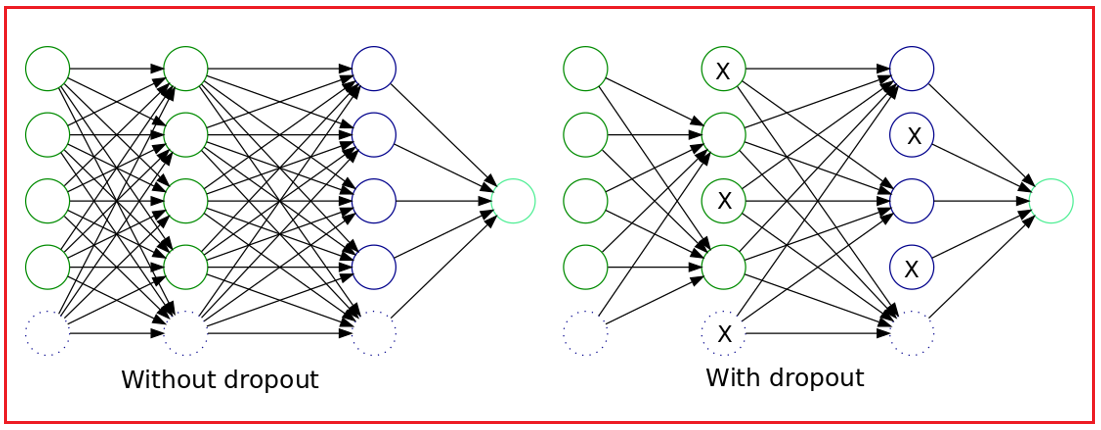

In [21]:
xtrain.shape[1]

17

### Dropout layer - Randomly drop some % of neuron links

In [22]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout


In [23]:
# Initialize the model
model = Sequential()

# Input Layer
model.add (Input(shape=(xtrain.shape[1],)))

# Hidden Layer 1
model.add (Dense (64, activation='relu'))
model.add (Dropout(0.4))

#Hidden layer 2
model.add (Dense (32, activation = 'relu'))
model.add (Dropout(0.3))

# Add Dropout layer
model.add (Dense (1, activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',
              metrics=["accuracy"],
              optimizer='adam')


In [26]:
hist = model.fit (xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
842/842 [==============================] - 11s 6ms/step - loss: 0.5311 - accuracy: 0.7337 - val_loss: 0.4822 - val_accuracy: 0.7702
Epoch 2/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4874 - accuracy: 0.7673 - val_loss: 0.4765 - val_accuracy: 0.7751
Epoch 3/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4781 - accuracy: 0.7752 - val_loss: 0.4734 - val_accuracy: 0.7776
Epoch 4/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4723 - accuracy: 0.7785 - val_loss: 0.4680 - val_accuracy: 0.7830
Epoch 5/60
842/842 [==============================] - 4s 5ms/step - loss: 0.4699 - accuracy: 0.7807 - val_loss: 0.4661 - val_accuracy: 0.7840
Epoch 6/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4689 - accuracy: 0.7810 - val_loss: 0.4669 - val_accuracy: 0.7843
Epoch 7/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4679 - accuracy: 0.7851 - val_loss: 0.4627 - val_accuracy: 0.7873
Epoch

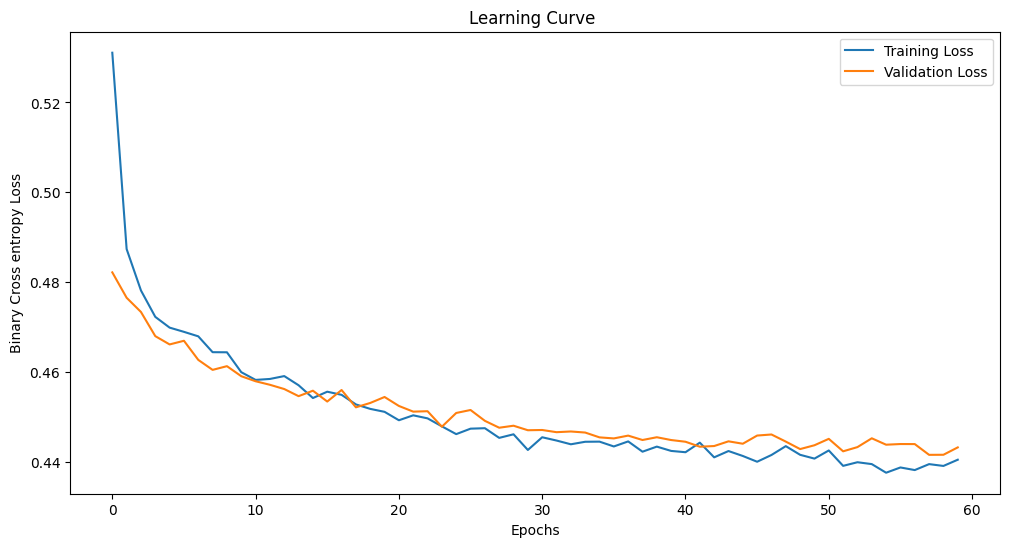

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt. plot (hist.history['loss'], label = "Training Loss")
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross entropy Loss')
plt.title ('Learning Curve ')
plt. legend()
plt.show()



In [28]:
model.evaluate (xtrain, ytrain)

1053/1053 [==============================] - 4s 3ms/step - loss: 0.4239 - accuracy: 0.8106


[0.42393049597740173, 0.8105997443199158]

In [30]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.8063


[0.43047085404396057, 0.8062945604324341]

### Get predictions on train and test

In [31]:
yprob_train = model.predict (xtrain)
yprob_test = model.predict (xtest)

264/264 [==============================] - 0s 2ms/step


In [32]:
yprob_train[0:5]

array([[0.00669046],
       [0.1932411 ],
       [0.76617825],
       [0.7570435 ],
       [0.76108634]], dtype=float32)

In [34]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [38]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [36]:
ypred_train [0:5]

[0, 0, 1, 1, 1]

In [39]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [41]:
yprob_test[0:5]

array([[0.02830681],
       [0.8632647 ],
       [0.37550387],
       [0.01275787],
       [0.16794753]], dtype=float32)

### Confusion Matrix

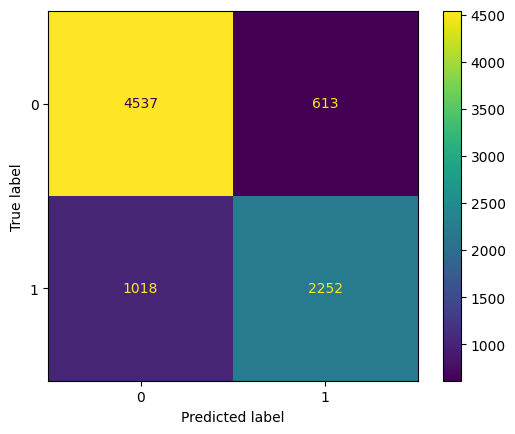

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions (ytest, ypred_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5150
           1       0.79      0.69      0.73      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.78      0.79      8420
weighted avg       0.80      0.81      0.80      8420



In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_test)

0.8783932781093198

## ROC_AUC score is more than 80% hence model is good

### Out of sample predictions


In [45]:
url2 = ('https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv')
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [47]:
xnew2 = xnew.drop (columns = ['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [48]:
xnew2_pre = num_pipe.fit_transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [49]:
probs = model.predict (xnew2_pre)

878/878 [==============================] - 2s 3ms/step


In [50]:
probs[0:5]

array([[0.12453144],
       [0.03730757],
       [0.30470765],
       [0.16986187],
       [0.5887466 ]], dtype=float32)

In [52]:
preds = [1 if prob>=0.5 else 0 for prob in probs ]
preds[0:5]

[0, 0, 0, 0, 1]

In [53]:
df_final = xnew[['id']]
df_final['booking_status'] = preds
df_final ['probablity'] = probs

In [54]:
df_final

,id,booking_status,probablity
0,42100,0,0.124531
1,42101,0,0.037308
2,42102,0,0.304708
3,42103,0,0.169862
4,42104,1,0.588747
...,...,...,...
28063,70163,1,0.946112
28064,70164,0,0.039635
28065,70165,0,0.149092
28066,70166,0,0.450095


<Axes: xlabel='booking_status'>

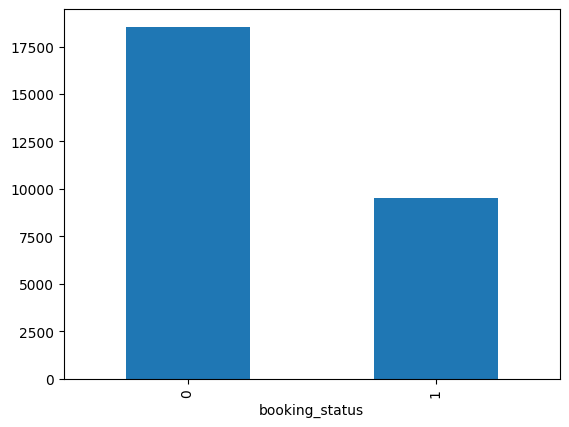

In [55]:
df_final['booking_status'].value_counts().plot(kind='bar')

In [56]:
df_final.to_csv('Results.csv', index = False)